<a href="https://colab.research.google.com/github/Ajay-Rajesh/Market-segmentation-/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import pairwise_distances
from scipy import stats
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/mcdonalds.csv')

In [ ]:
#Basic Features of the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
#First 5 rows of the Data Frame
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
#Converting the binary output features(Yes/No) into binary digits(1/0)
df = df.replace({'Yes':1,'No':0})
df.head()

/tmp/ipython-input-3109713975.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes':1,'No':0})


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [ ]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000


In [ ]:
#Segment selection
MD_x = df.iloc[:, :11].astype(float)
print(np.round(MD_x.mean(), 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
#PCA
pca = PCA(n_components=MD_x.shape[1], svd_solver='full')
pca.fit(MD_x)

PCA(n_components=11, svd_solver='full')

In [ ]:
#Standard Deviation
std_devs = np.sqrt(pca.explained_variance_)
prop_var = pca.explained_variance_ratio_
cum_var = np.cumsum(prop_var)

print("\nStandard Deviation:")
print(np.round(std_devs, 4))

print("\nProportion of Variance:")
print(np.round(prop_var, 4))

print("\nCumulative Proportion:")
print(np.round(cum_var, 4))


Standard Deviation:
[0.757  0.6075 0.5046 0.3988 0.3374 0.3103 0.2897 0.2751 0.2653 0.2488
 0.2369]

Proportion of Variance:
[0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]

Cumulative Proportion:
[0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]


In [ ]:
#Round-off to 1
std_devs = np.sqrt(pca.explained_variance_)
print("Standard deviations (1,..,p=11):")
print(np.round(std_devs, 1))

Standard deviations (1,..,p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [ ]:
#Loadings (rotation)
loadings = pd.DataFrame(pca.components_.T,
                        index=MD_x.columns,
                        columns=[f"PC{i}" for i in range(1, MD_x.shape[1]+1)])
print(loadings.round(3))

              PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9  \
yummy       0.477 -0.364  0.304  0.055  0.308 -0.171 -0.281 -0.013 -0.572   
convenient  0.155 -0.016  0.063 -0.142 -0.278  0.348 -0.060  0.113  0.018   
spicy       0.006 -0.019  0.037  0.198 -0.071  0.355  0.708 -0.376 -0.400   
fattening  -0.116  0.034  0.322 -0.354  0.073  0.407 -0.386 -0.590  0.161   
greasy     -0.304  0.064  0.802  0.254 -0.361 -0.209  0.036  0.138  0.003   
fast        0.108  0.087  0.065 -0.097 -0.108  0.595 -0.087  0.628 -0.166   
cheap       0.337  0.611  0.149  0.119  0.129  0.103 -0.040 -0.140 -0.076   
tasty       0.472 -0.307  0.287 -0.003  0.211  0.077  0.360  0.073  0.639   
expensive  -0.329 -0.601 -0.024  0.068  0.003  0.261 -0.068 -0.030 -0.067   
healthy     0.214 -0.077 -0.192  0.763 -0.288  0.178 -0.350 -0.176  0.186   
disgusting -0.375  0.140  0.089  0.370  0.729  0.211 -0.027  0.167  0.072   

             PC10   PC11  
yummy       0.110 -0.045  
convenient  0.666  0.

In [ ]:
scores = pca.transform(MD_x)
print(scores)

[[-0.42536706  0.21907878 -0.6632553  ... -0.18100693 -0.51570617
   0.56707389]
 [ 0.21863768 -0.38818996  0.73082668 ... -0.11147641 -0.49331285
   0.50044033]
 [-0.37541475 -0.73043507  0.12203978 ...  0.32228786 -0.06175857
  -0.24274108]
 ...
 [ 0.18589445 -1.06266156 -0.22085675 ... -0.03825472 -0.05651822
   0.01279977]
 [ 1.18206441  0.03856977 -0.56156066 ... -0.02226748  0.00257265
   0.10531631]
 [-1.55024186 -0.27503101  0.01373727 ...  0.13658866  0.43279782
   0.45607556]]


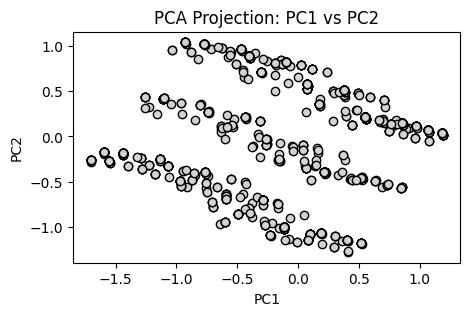

In [ ]:
#Visualization of PC1 and PC2
pca_2 = PCA(n_components=2, svd_solver='full')
pca_2.fit(MD_x)
X_pca_2 = pca_2.transform(MD_x)
plt.figure(figsize=(5, 3))
plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], color='lightgrey', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection: PC1 vs PC2")
plt.show()

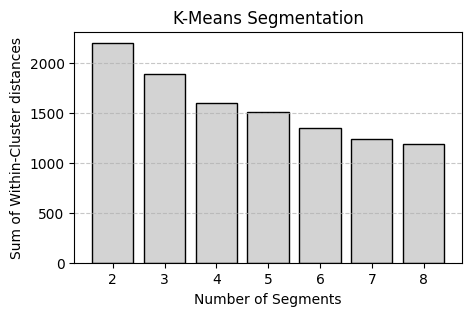

In [ ]:
#Segment Extraction using K-Means Analysis
X_pca = pca.fit_transform(MD_x)
inertias = []
K = range(2, 9)
kmeans_results = {}

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    kmeans_results[k] = kmeans.labels_

#Segment Visualization
plt.figure(figsize=(5,3))
plt.bar(K, inertias, color='lightgrey', edgecolor='black')
plt.title("K-Means Segmentation")
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Within-Cluster distances")
plt.xticks(K)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

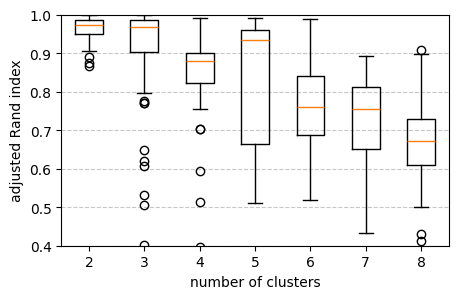

In [ ]:
#Global stability boxplot
np.random.seed(1234)

stability = {k: [] for k in range(2, 9)}
n_boot = 100
n_rep = 10

for k in range(2, 9):
    ref_model = KMeans(n_clusters=k, n_init=n_rep, random_state=1234).fit(MD_x)
    ref_labels = ref_model.labels_

#bootstrap resampling
    for b in range(n_boot):
        boot_idx = np.random.choice(len(MD_x), size=len(MD_x), replace=True)
        boot_sample = MD_x.iloc[boot_idx]
        boot_model = KMeans(n_clusters=k, n_init=n_rep, random_state=b).fit(boot_sample)
        boot_labels = boot_model.labels_
        ari = adjusted_rand_score(ref_labels[boot_idx], boot_labels)
        stability[k].append(ari)

#boxplot
plt.figure(figsize=(5,3))
plt.boxplot(stability.values(), tick_labels=stability.keys())
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.ylim(0.4, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

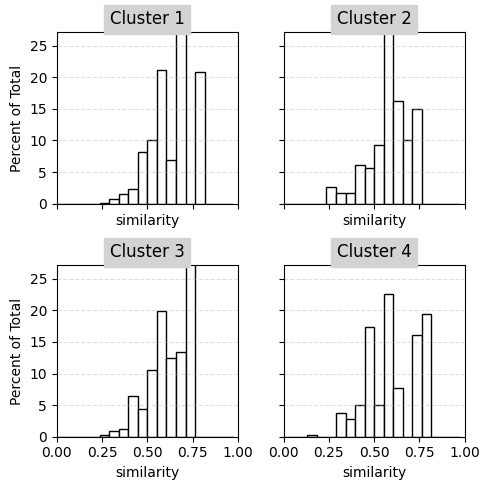

In [ ]:
# Gorge Plot for 4-Segment K-Means Solution
kmeans = KMeans(n_clusters=4, random_state=1234)
labels = kmeans.fit_predict(MD_x)


df['segment'] = labels

#compute similarities
dists = pairwise_distances(MD_x, kmeans.cluster_centers_)
max_dist = dists.max()
similarity = 1 - dists[np.arange(len(MD_x)), labels] / max_dist

gorge_df = pd.DataFrame({
    "similarity": similarity,
    "Cluster": labels
})

#plotting
fig, axes = plt.subplots(2, 2, figsize=(5,5), sharex=True, sharey=True)
axes = axes.flatten()
bins = np.linspace(0, 1, 20)

for i, ax in enumerate(axes):
    cluster_data = gorge_df[gorge_df["Cluster"] == i]["similarity"]
    counts, _ = np.histogram(cluster_data, bins=bins)
    percent = counts / counts.sum() * 100

    ax.bar(bins[:-1], percent, width=(bins[1]-bins[0]), edgecolor='k', color='white')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, percent.max() * 1.2)
    ax.set_title(f"Cluster {i+1}", backgroundcolor='lightgray')
    ax.grid(axis='y', linestyle='--', alpha=0.4)
    ax.set_xlabel("similarity")
    if i in (0, 2):  # left column labels
        ax.set_ylabel("Percent of Total")

plt.tight_layout()
plt.show()

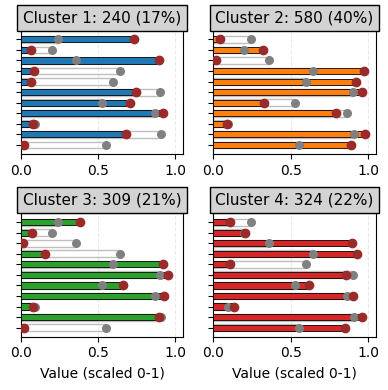

In [ ]:
#Segment Profiling

#Segment Profile Plot
def segment_profile_panels(df, n_clusters=4, figsize=(4,4), cmap='tab10'):
  features = df.columns.tolist()
  scaler = MinMaxScaler()
  X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=features, index=df.index)
  km = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
  labels = km.fit_predict(X_scaled.values)
  labels = np.asarray(labels)

  overall_mean = X_scaled.mean(axis=0)
  cluster_means = pd.DataFrame(X_scaled).assign(_cluster=labels).groupby('_cluster').mean()
  cluster_sizes = pd.Series(labels).value_counts().sort_index()
  total = len(labels)
  unique = sorted(cluster_means.index.tolist())
  if unique != list(range(len(unique))):
      cluster_means = cluster_means.reindex(sorted(cluster_means.index))
      cluster_sizes = cluster_sizes.reindex(sorted(cluster_sizes.index)).fillna(0).astype(int)

  k_actual = cluster_means.shape[0]
  colors = plt.get_cmap(cmap).colors

  #plotting
  fig, axes = plt.subplots(2, 2, figsize=figsize, sharex=True, sharey=True)
  axes = axes.flatten()
  n_features = len(features)
  y_pos = np.arange(n_features)
  xmin, xmax = 0.0, 1.0
  pad = 0.05
  xlim_upper = xmax + pad

  for i, ax in enumerate(axes):
      if i >= k_actual:
          ax.axis('off')
          continue

      cm_mean = cluster_means.loc[i, features].values
      ov = overall_mean.values

      bar_height = 0.65
      edgecolor = '#bfbfbf'
      for yi in range(n_features):
          left = 0.0
          rect = plt.Rectangle((left, y_pos[yi]-bar_height/2),
                                ov[yi], bar_height,
                                edgecolor=edgecolor, facecolor='none', linewidth=1, zorder=1)
          ax.add_patch(rect)
          ax.scatter(ov[yi], y_pos[yi], color='grey', s=30, zorder=4)

      col = colors[i % len(colors)]
      for yi in range(n_features):
          ax.barh(y_pos[yi], cm_mean[yi], height=bar_height*0.9, color=col,
                  edgecolor='k', linewidth=0.6, zorder=3)

          ax.plot(cm_mean[yi], y_pos[yi], 'o', color='#9b2b2b', markersize=6, zorder=5)

      n_members = int(cluster_sizes.get(i, 0))
      pct = 100.0 * n_members / total if total>0 else 0.0
      ax.set_yticks(y_pos)
      ax.set_yticklabels(features if i in (0,2) else ['']*n_features)
      ax.invert_yaxis()
      ax.set_xlim(xmin, xlim_upper)
      ax.xaxis.set_ticks_position('bottom')
      ax.grid(axis='x', linestyle='--', alpha=0.25)
      ax.set_title(f'Cluster {i+1}: {n_members} ({pct:.0f}%)', fontsize=11, pad=6,
                     bbox=dict(facecolor='lightgray', edgecolor='k', pad=4))

      if i in (0,2):
          ax.set_ylabel('')
      if i in (2,3):
          ax.set_xlabel('Value (scaled 0-1)')

  plt.tight_layout()
  plt.show()

#main
segment_profile_panels(MD_x)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


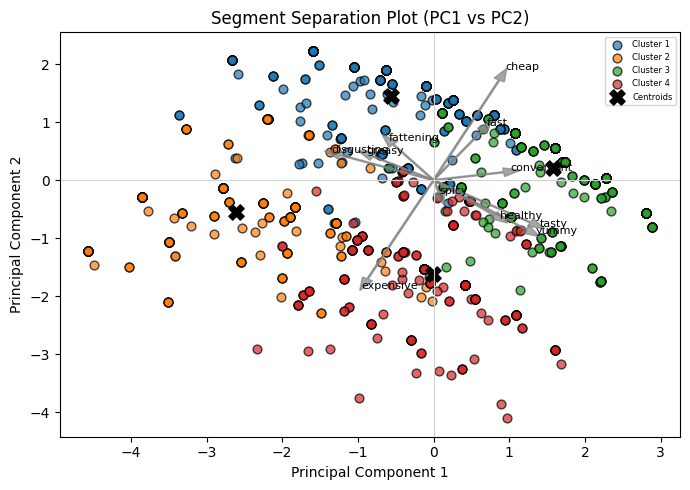

In [ ]:
#Segment Separation Plot
def segment_separation_plot(df, n_clusters=4, random_state=1234, show_axes=True):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    pca = PCA(n_components=2, random_state=random_state)
    X_pca = pca.fit_transform(X_scaled)

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
    labels = kmeans.fit_predict(df)
    centers = pca.transform(scaler.transform(kmeans.cluster_centers_))

    plt.figure(figsize=(7,5))
    colors = plt.get_cmap("tab10").colors

    for i in range(n_clusters):
        cluster_points = X_pca[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1],
                    color=colors[i], s=40, edgecolor='k', alpha=0.7, label=f"Cluster {i+1}")

    plt.scatter(centers[:, 0], centers[:, 1],
                c='black', marker='X', s=120, label='Centroids')

    if show_axes:
        loadings = pca.components_.T
        scale = 3
        for i, feature in enumerate(df.columns):
            x, y = loadings[i] * scale
            plt.arrow(0, 0, x, y, color='gray', width=0.02, head_width=0.15, alpha=0.7)
            plt.text(x * 1.1, y * 1.1, feature, fontsize=8, color='black')

    ev = pca.explained_variance_ratio_
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("Segment Separation Plot (PC1 vs PC2)")
    plt.axhline(0, color='lightgray', linewidth=0.8)
    plt.axvline(0, color='lightgray', linewidth=0.8)
    plt.legend(loc='best', fontsize=6)
    plt.tight_layout()
    plt.show()

#main
segment_separation_plot(MD_x, n_clusters=4)

Chi² = 809.52, p < 0.001


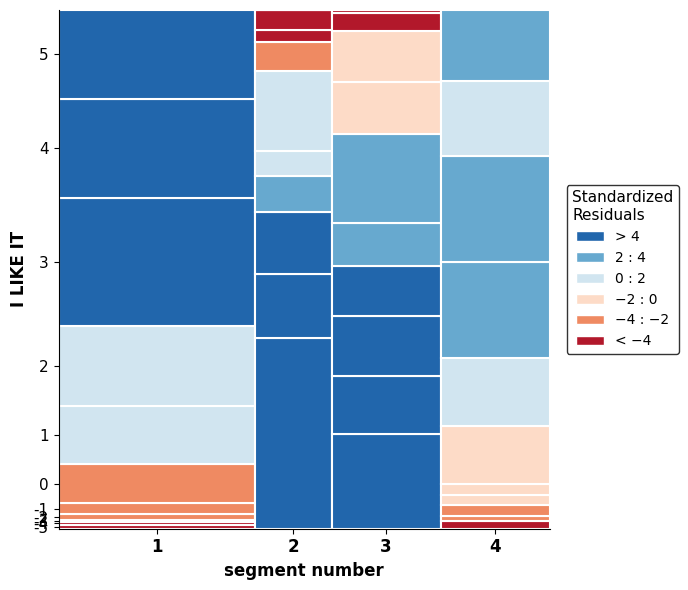

In [ ]:
#Shaded mosaic plot for segment membership and I LIKE IT

df['segment'] = labels + 1  # 1..4
df['Like'] = (
    df['Like']
    .astype(str).str.strip()
    .replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})
    .str.replace('+', '', regex=False)
    .astype(int))
df['Like'] = pd.Categorical(df['Like'], categories=range(-5, 6), ordered=True)

ct = pd.crosstab(df['Like'], df['segment'])
chi2, p, dof, exp = stats.chi2_contingency(ct)
std_resid = (ct - exp) / np.sqrt(exp)
print(f"Chi² = {chi2:.2f}, p < 0.001")

def shade_color(val):
    if val < -4: return '#B2182B'
    elif val < -2: return '#EF8A62'
    elif val < 0: return '#FDDBC7'
    elif val < 2: return '#D1E5F0'
    elif val < 4: return '#67A9CF'
    else: return '#2166AC'

fig, ax = plt.subplots(figsize=(7, 6))

n_like = len(ct.index)
n_seg = len(ct.columns)

seg_props = ct.sum(axis=0) / ct.sum().sum()
seg_widths = np.cumsum(seg_props)
seg_widths = np.insert(seg_widths, 0, 0)

like_labels = ct.index.astype(str).tolist()
seg_labels = ct.columns.astype(str).tolist()

for seg_idx in range(n_seg):
    seg_data = ct.iloc[:, seg_idx]
    seg_total = seg_data.sum()

    like_props = seg_data / seg_total
    like_heights = np.cumsum(like_props)
    like_heights = np.insert(like_heights, 0, 0)

    x_start = seg_widths[seg_idx]
    x_width = seg_widths[seg_idx+1] - seg_widths[seg_idx]

    for like_idx in range(n_like):
        y_start = like_heights[like_idx]
        y_height = like_heights[like_idx+1] - like_heights[like_idx]

        color = shade_color(std_resid.iloc[like_idx, seg_idx])

        rect = Rectangle((x_start, y_start), x_width, y_height,facecolor=color, edgecolor='white', linewidth=1.5)
        ax.add_patch(rect)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

seg_centers = [(seg_widths[i] + seg_widths[i+1]) / 2 for i in range(n_seg)]
ax.set_xticks(seg_centers)
ax.set_xticklabels(seg_labels, fontsize=12, fontweight='bold')
ax.set_xlabel('segment number', fontsize=12, fontweight='bold')

like_centers = []
seg_data = ct.iloc[:, 0]
like_props = seg_data / seg_data.sum()
like_heights = np.cumsum(like_props)
like_heights = np.insert(like_heights, 0, 0)
like_centers = [(like_heights[i] + like_heights[i+1]) / 2 for i in range(n_like)]

ax.set_yticks(like_centers)
ax.set_yticklabels(like_labels, fontsize=11)
ax.set_ylabel('I LIKE IT', fontsize=12, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_data = [
    ('> 4', '#2166AC'),
    ('2 : 4', '#67A9CF'),
    ('0 : 2', '#D1E5F0'),
    ('−2 : 0', '#FDDBC7'),
    ('−4 : −2', '#EF8A62'),
    ('< −4', '#B2182B')
]

legend_patches = [mpatches.Patch(facecolor=color, edgecolor='white', label=label)
                  for label, color in legend_data]

ax.legend(handles=legend_patches, title='Standardized\nResiduals',
          loc='center left', bbox_to_anchor=(1.02, 0.5),
          fontsize=10, title_fontsize=11, frameon=True, edgecolor='black')

plt.title('', fontsize=12)
plt.tight_layout()
plt.show()


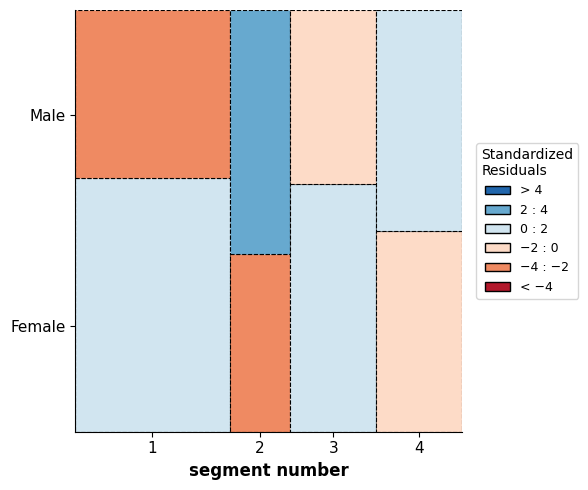

In [ ]:
#Shaded mosaic plot segment membership and gender

ct_gender = pd.crosstab(df['Gender'], df['segment'])
chi2, p, dof, exp = stats.chi2_contingency(ct_gender)
std_resid = (ct_gender - exp) / np.sqrt(exp)

fig, ax = plt.subplots(figsize=(6,5))
n_rows, n_cols = ct_gender.shape
seg_props = ct_gender.sum(axis=0) / ct_gender.values.sum()
x_edges = np.insert(np.cumsum(seg_props), 0, 0)

for c in range(n_cols):
    seg_data = ct_gender.iloc[:, c]
    seg_total = seg_data.sum()
    y_props = seg_data / seg_total
    y_edges = np.insert(np.cumsum(y_props), 0, 0)
    x0 = x_edges[c]
    w  = x_edges[c+1] - x_edges[c]
    for r in range(n_rows):
        y0 = y_edges[r]
        h  = y_edges[r+1] - y_edges[r]
        color = shade_color(std_resid.iloc[r, c])
        rect = Rectangle((x0, y0), w, h, facecolor=color,
                         edgecolor='black', linewidth=0.8, linestyle='--')
        ax.add_patch(rect)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("segment number", fontsize=12, fontweight='bold')
ax.set_xticks([(x_edges[i]+x_edges[i+1])/2 for i in range(n_cols)])
ax.set_xticklabels(ct_gender.columns.astype(str), fontsize=11)
ax.set_yticks([0.25, 0.75])
ax.set_yticklabels(ct_gender.index.astype(str), fontsize=11)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

legend_data = [
    ('> 4',  '#2166AC'),
    ('2 : 4', '#67A9CF'),
    ('0 : 2', '#D1E5F0'),
    ('−2 : 0', '#FDDBC7'),
    ('−4 : −2', '#EF8A62'),
    ('< −4',  '#B2182B')
]
legend_patches = [mpatches.Patch(facecolor=c, edgecolor='black', label=l) for l, c in legend_data]
ax.legend(handles=legend_patches, title='Standardized\nResiduals',
          loc='center left', bbox_to_anchor=(1.02, 0.5),
          fontsize=9, title_fontsize=10, frameon=True)
plt.tight_layout()
plt.show()

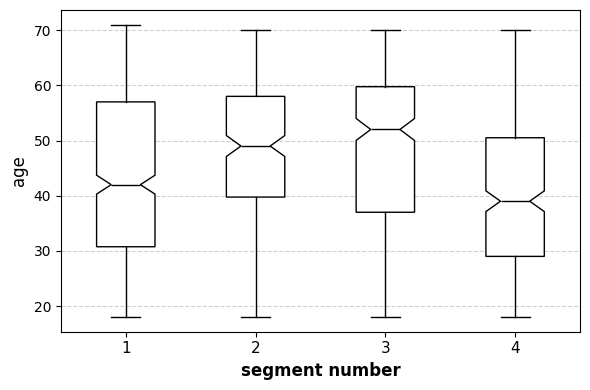

In [ ]:
#Parallel box-and-whisker plot of age by segment for the fast food data set

plt.figure(figsize=(6,4))
groups = [df.loc[df["segment"] == s, "Age"].astype(float)
           for s in sorted(df["segment"].unique())]

plt.boxplot(groups, notch=True, patch_artist=True,
            boxprops=dict(facecolor='white', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))

plt.xlabel("segment number", fontsize=12, fontweight='bold')
plt.ylabel("age", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(1, len(groups)+1), sorted(df["segment"].unique()), fontsize=11)
plt.tight_layout()
plt.show()

   Cluster  size  visit_mean  like_mean  female_prop
0        1   448    2.633929  -1.658482     0.535714
1        2   577    3.977470   2.734835     0.601386
2        3   113    1.849558  -3.858407     0.451327
3        4   315    3.911111   2.317460     0.476190


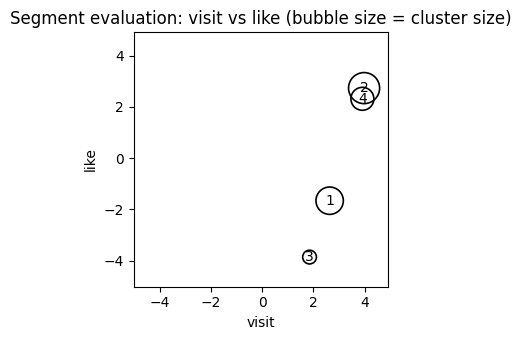

In [ ]:
#Selecting target segment and Segment Evaluation Plot
visit_map = {
    'Never': 1,
    'Once a year': 2,
    'Every three months': 3,
    'Once a month': 4,
    'Once a week': 5,
    'More than once a week': 6
}
df['Visit_num'] = df['VisitFrequency'].map(visit_map)

def like_to_num(x):
    if pd.isna(x): return np.nan
    m = re.search(r'([+-]?\d+)', str(x))
    return int(m.group(1)) if m else np.nan
df['Like_num'] = df['Like'].apply(like_to_num)

df['Female'] = (df['Gender'].astype(str).str.lower() == 'female').astype(int)
for c in ('Visit_num','Like_num','Female'):
  if c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce')

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in ('Like_num','Visit_num','Female'):
    if c in df.columns and c not in numeric_cols:
        numeric_cols.append(c)
# drop columns that have no valid numbers
numeric_cols = [c for c in numeric_cols if df[c].notna().sum() > 0]

X = df[numeric_cols].copy()
X = X.fillna(X.median())
Xs = StandardScaler().fit_transform(X)

df['Cluster'] = KMeans(n_clusters=4, random_state=1234, n_init=10).fit_predict(Xs) + 1

grouped = df.groupby('Cluster')
visit_mean = grouped['Visit_num'].mean()
like_mean  = grouped['Like_num'].mean()
female_prop = grouped['Female'].mean()
sizes = grouped.size()

grp = df.groupby('Cluster')
summary = pd.DataFrame({
    'size': grp.size(),
    'visit_mean': grp['Visit_num'].mean() if 'Visit_num' in df.columns else np.nan,
    'like_mean':  grp['Like_num'].mean()  if 'Like_num' in df.columns else np.nan,
    'female_prop':grp['Female'].mean()    if 'Female' in df.columns else np.nan
}).reset_index()
print(summary)

#plot
clusters = sorted(visit_mean.index.tolist())
x = np.array([visit_mean.loc[c] for c in clusters])
y = np.array([like_mean.loc[c]  for c in clusters])
n = np.array([sizes.loc[c]      for c in clusters])

max_area = 500
areas = (np.sqrt(n) / np.sqrt(n).max()) * np.sqrt(max_area)
areas = areas**2

fig, ax = plt.subplots(figsize=(3.5,3.5))
sc = ax.scatter(x, y, s=areas, facecolors='none', edgecolors='k', linewidth=1.2, zorder=2)

for xi, yi, ci in zip(x, y, clusters):
    ax.text(xi, yi, str(int(ci)), ha='center', va='center', fontsize=10, zorder=3)

ax.set_xlabel('visit')
ax.set_ylabel('like')
ax.set_title('Segment evaluation: visit vs like (bubble size = cluster size)')
ax.grid(False)

plt.gca().set_aspect('equal', adjustable='box')

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
min_val = min(x_min, y_min)
max_val = max(x_max, y_max)
pad = (max_val - min_val) * 0.1
ax.set_xlim(min_val - pad, max_val + pad)
ax.set_ylim(min_val - pad, max_val + pad)
ax.set_box_aspect(1)

plt.tight_layout()
plt.show()

